## Homework #5 (Jan Betlej, 05.04.2018)

Implement the Czekanowski-Dice index. 

\begin{equation}
C=2\frac{P\times R}{P+R}.
\end{equation}
Precision is defined as:
\begin{equation}
PPV=\frac{\#TP}{\#TP+\#FP}.
\end{equation}
Recall is defined as:
\begin{equation}
TPR=\frac{\#TP}{\#TP+\#FN}.
\end{equation}

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Additional argument positive_index is id number of group treated as positive
def czekanowski_dice_index(assignation,labels,positive_index):
    assigned_groups = []
    for el in range(len(assignation)):
        group_id = np.argmax(assignation[el])
        assigned_groups.append(group_id)
    # My code begins here
    # Defining elements of confusion matrix
    TP=0
    TN=0
    FP=0
    FN=0
    # Comparing predicted and real labels
    for i in range(len(labels)):
        #Writing real and predicted labels (respectively) to variables to save time
        l,a=labels[i],assigned_groups[i]
        if l==a:
            if l==positive_index:
                TP+=1
            else:
                TN+=1
        elif l!=a:
            if l==positive_index:
                FN+=1
            elif a==positive_index:
                FP+=1
            else:
                # Case possible for num of groups > 2; wrongly predicted group, but really not the positive one. 
                # So: true negative
                TN+=1
    #Merging elements to form confusion matrix
    conf_matrix=np.array([[TP,FP],[TN,FN]])
    #Calculating precission (P), recall (R), and Czekanowski-Dice index (C) 
    P=TP/(TP+FP)
    R=TP/(TP+FN)
    C=2*P*R/(P+R)
    #Printing for test
    #print (assigned_groups,conf_matrix)
    #print (P,R)
    return C

ass_example=[[0.5,0.7],[0.3,0.4],[0.9,0.8]]
czekanowski_dice_index(ass_example,[0,1,0],0)

0.6666666666666666

### Test on random results

[0 0 0 ... 0 0 1]
[0 1 1 ... 1 2 1]
[2 2 2 ... 2 0 0]
[4 0 4 ... 1 0 2]
[3 5 2 ... 3 2 0]
[3 0 4 ... 4 2 4]
[6 0 4 ... 4 1 6]
[6 4 8 ... 8 2 8]
[0 8 5 ... 2 5 1]
[0.4992178873757821, 0.33375313164046294, 0.25030947163477135, 0.2019134000434523, 0.1660967151526828, 0.14101526222642766, 0.1251264430564699, 0.11032095657646318, 0.10021110766490911]


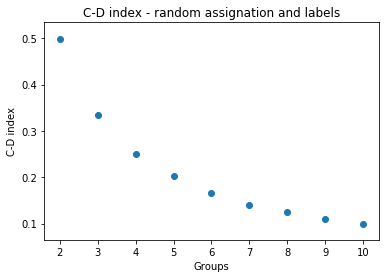

In [5]:
#More complex random tests on czekanowski_dice_index
j_list=[]
c_list=[]
# Exponent of number of points
i=6
for j in range(2,11):
    assignation=np.random.rand(10**i,j)
    labels=np.random.randint(j,size=10**i)
    print (labels)
    c=czekanowski_dice_index(assignation,labels,0)
    j_list.append(j)
    c_list.append(c)

print (c_list)

plt.figure()
plt.scatter(j_list,c_list)
plt.xlabel('Groups')
plt.ylabel('C-D index')
plt.title('C-D index - random assignation and labels')
plt.show()

** For completely random sets and assignations, C-D index decreases with number of (almost equally represented) groups. It is practically equal to 1/groups in such case **